# Experiment 2: Document at various level for small dataset(COVID-science:non-science)

## 1. Article level

In the file each article is seperated by 'NEW_PAPER' in 'covid-scienc.txt' and 'NEW NEWSPAPER' in 
'covid-non-science'.

In [1]:
#import
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as s
import dataframe_image as dfi
import networkx as nx

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### covid-science-small.txt

In [2]:
def load_data(path,file_name,seperator):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r", encoding="utf8") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            i=i+1
            if text !='':
                document = document+text
                if text == seperator:
                    documents_list.append(document)
                    document = ''
        documents_list.append(document)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [3]:
document_list,titles,word_count=load_data("","covid-science-small.txt",'NEW_PAPER')

Number of words in text file : 59691
Total Number of Documents: 10


In [4]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        tokens = [i for i in tokens if len(i)>4]
        print(tokens)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [5]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnetmethodology', 'predicting', 'covid', '19based', 'chest', 'imagess', 'tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte', 'guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova', 'olmedo', 'sánchez', 'herreraabstract', 'currently', 'coronavirus', 'disease', 'covid', 'infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans', 'orchest', 'images', 'computed', 'tomography', 'scanners', 'testing', 'available', 'mostmedical', 'centers', 'hence', 'cases', 'imagesbecome', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networkshave', 'great', 'potential', 'building', 'covid', 'triage', 'systemsand', 'detecting', 'covid', 'patients', 'especially', 'patients', 'withlow', 'severity', 'unfortunately', 'current', 'databases', 'allowbuilding', 'systems', 'highly', 'heterogeneousand', 'biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sensit

In [6]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [7]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    #print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [8]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_covid_science =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [9]:
words_covid_science =dict(model.show_topic(0, topn=words))
dict(model.show_topic(0, topn=5))

{'covid': 0.46802988644393434,
 'model': 0.331982526282952,
 'imag': 0.32671571923605003,
 'class': 0.20559425407282847,
 'dataset': 0.157764176617409}

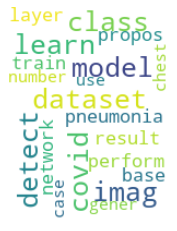

In [10]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph6.png')

In [11]:
# LSA Model
number_of_topics = 10 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_covid_science =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_covid_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled6.png')

cosine-similarity
            covid      model      imag     class    dataset
covid           1   0.276431  0.526791  0.696117   0.764792
model    0.276431          1 -0.242246 -0.040174  0.0536525
imag     0.526791  -0.242246         1  0.438891   0.285846
class    0.696117  -0.040174  0.438891         1    0.83488
dataset  0.764792  0.0536525  0.285846   0.83488          1


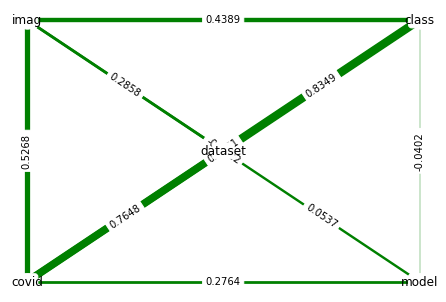

In [12]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='g',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig6.png')

### covid-non-science-small.txt

In [13]:
document_list,titles,word_count=load_data("","covid-non-science-small.txt",'NEW NEWSPAPER')

Number of words in text file : 5231
Total Number of Documents: 10


In [14]:
clean_text=preprocess_data(document_list)

['covid', 'recovery', 'covid', 'realityby', 'reuterspublished', 'updated', '2020by', 'joneslondon', 'reuters', 'world', 'shares', 'inched', 'towards', 'month', 'friday', 'industrial', 'bellwether', 'metal', 'copper', 'longest', 'weekly', 'winning', 'streak', 'nearly', 'three', 'years', 'recovering', 'global', 'nagging', 'coronavirus', 'nerves', 'market', 'rally', 'fuelled', 'record', 'numbers', 'largely', 'blown', 'itself', 'spike', 'covid', 'cases', 'though', 'fastest', 'expansion', 'china', 'services', 'sector', 'decade', 'stimulus', 'ensured', 'optimism', 'remained', 'chinese', 'shares', 'charged', 'their', 'highest', 'level', 'years', 'helping', 'asian', 'indexes', 'month', 'peaks', 'sight', 'european', 'markets', 'stalling', 'early', 'traders', 'surprise', 'currency', 'commodity', 'markets', 'subdued', 'after', 'otherwise', 'strong', 'confidence', 'sensitive', 'stalwarts', 'copper', 'sterling', 'australian', 'dollar', 'which', 'struggled', 'friday', 'think', 'infection', 'rates', 

In [15]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_non_science =dict(model.show_topic(0, topn=words))#dict and encoding matrix values


In [16]:
dict(model.show_topic(0,topn=5))

{'test': 0.6105961140643036,
 'peopl': 0.31072871004100167,
 'covid': 0.25119870827829094,
 'symptom': 0.23022371656243729,
 'fever': 0.17811639545747138}

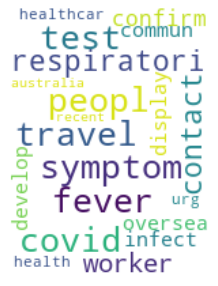

In [17]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph7.png')

In [18]:
# LSA Model
number_of_topics = 10 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_covid_non_science =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_covid_non_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled7.png')

cosine-similarity
             test     peopl      covid   symptom      fever
test            1   0.84355   0.226253  0.943014   0.924514
peopl     0.84355         1   0.210345  0.906806    0.91429
covid    0.226253  0.210345          1  0.032713  0.0207055
symptom  0.943014  0.906806   0.032713         1   0.992474
fever    0.924514   0.91429  0.0207055  0.992474          1


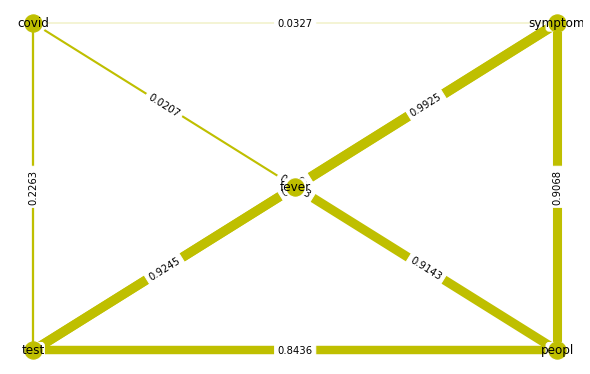

In [19]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="y")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig7.png')

### covid-psychology-small.txt

In [20]:
document_list,titles,word_count=load_data("","covid-psychology-SMALL.txt",'NEW PAPER')

Number of words in text file : 39735
Total Number of Documents: 10


In [21]:
clean_text=preprocess_data(document_list)

['international', 'sociology2021', 'author', '2020article', 'reuse', 'guidelines', 'sagepub', 'journals', 'permissionsdoi', '0268580920948807journals', 'sagepub', 'isspsychology', 'politics', 'ofcovid', 'misinfodemics', 'peoplebelieve', 'misinfodemics', 'sonia', 'mukhtaruniversity', 'management', 'technology', 'lahore', 'pakistanabstractmisinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adversehealth', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicateevidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects', 'ofmisinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevierabout', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article', 'thisreview', 'examines', 'mechanisms', 'operational', 'structure', 'prevalence', 'pr

In [22]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_psychology =dict(model.show_topic(0, topn=words))#dict and encoding matrix values


In [23]:
dict(model.show_topic(0,topn=5))

{'covid': 0.4199272025945545,
 'psycholog': 0.286949865048726,
 'pandem': 0.24145037935803174,
 'impact': 0.21712822111271948,
 'health': 0.19835033050070094}

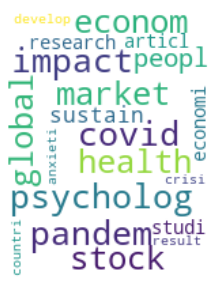

In [24]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph27.png')

In [25]:
# LSA Model
number_of_topics = 10 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_psychology =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_psychology,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled8.png')

cosine-similarity
              covid psycholog    pandem    impact    health
covid             1  0.515819  0.504336  0.600935  0.700286
psycholog  0.515819         1  0.424529  0.309454   0.15666
pandem     0.504336  0.424529         1  0.691884  0.582984
impact     0.600935  0.309454  0.691884         1  0.461942
health     0.700286   0.15666  0.582984  0.461942         1


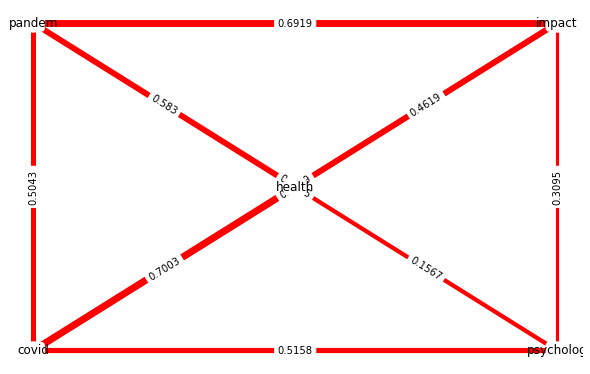

In [26]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='r',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig8.png')

## 2. 2-3 paragraphs

### covid-science-small.txt

In [27]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r",encoding="utf8") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for word in words:
                i=i+1
                document = document+word+' '
                if i == 200:
                    documents_list.append(document)
                    document,i = '',0
                    if len(documents_list) == 2:
                        break
    print("Total Number of Documents:",len(documents_list))
    #titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [28]:
document_list,titles,word_count=load_data("","covid-science-small.txt")

Number of words in text file : 59691
Total Number of Documents: 2


In [29]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnet', 'methodology', 'predicting', 'covid', 'based', 'chest', 'images', 'tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte', 'guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova', 'olmedo', 'sánchez', 'herrera', 'abstract', 'currently', 'coronavirus', 'disease', 'covid', 'infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans', 'chest', 'images', 'computed', 'tomography', 'scanners', 'testing', 'available', 'medical', 'centers', 'hence', 'cases', 'images', 'become', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networks', 'great', 'potential', 'building', 'covid', 'triage', 'systems', 'detecting', 'covid', 'patients', 'especially', 'patients', 'severity', 'unfortunately', 'current', 'databases', 'allow', 'building', 'systems', 'highly', 'heterogeneous', 'biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sensitivities', 'ach

In [30]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_science =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [31]:
words_from_law =dict(model.show_topic(0, topn=words))
dict(model.show_topic(0, topn=5))

{'support': -0.32899471788278967,
 'granada': -0.24814037209037268,
 'covid': -0.22769581399154282,
 'programm': -0.21932981192185982,
 'research': -0.21932981192185982}

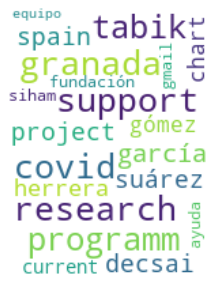

In [32]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph8.png')

In [33]:
# LSA Model
number_of_topics = 2 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_covid_science =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_covid_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled9.png')

cosine-similarity
            support   granada      covid   programm   research
support           1  0.956969 -0.0794645          1          1
granada    0.956969         1   0.213226   0.956969   0.956969
covid    -0.0794645  0.213226          1 -0.0794645 -0.0794645
programm          1  0.956969 -0.0794645          1          1
research          1  0.956969 -0.0794645          1          1


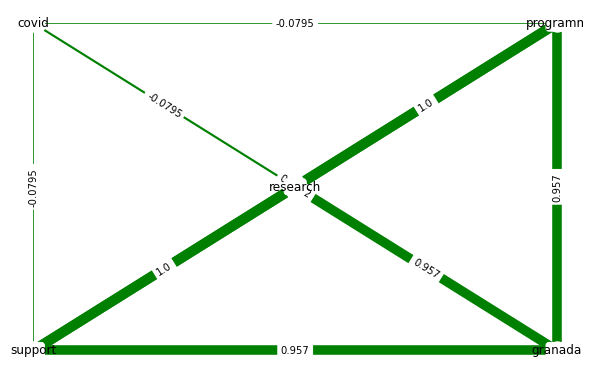

In [34]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='g',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig9.png')

### covid-non-science-small.txt

In [35]:
document_list,titles,word_count=load_data("","covid-non-science-small.txt")

Number of words in text file : 5231
Total Number of Documents: 2


In [36]:
clean_text=preprocess_data(document_list)

['covid', 'recovery', 'covid', 'reality', 'reuters', 'published', 'updated', 'jones', 'london', 'reuters', 'world', 'shares', 'inched', 'towards', 'month', 'friday', 'industrial', 'bellwether', 'metal', 'copper', 'longest', 'weekly', 'winning', 'streak', 'nearly', 'three', 'years', 'recovering', 'global', 'nagging', 'coronavirus', 'nerves', 'market', 'rally', 'fuelled', 'record', 'numbers', 'largely', 'blown', 'itself', 'spike', 'covid', 'cases', 'though', 'fastest', 'expansion', 'china', 'services', 'sector', 'decade', 'stimulus', 'ensured', 'optimism', 'remained', 'chinese', 'shares', 'charged', 'their', 'highest', 'level', 'years', 'helping', 'asian', 'indexes', 'month', 'peaks', 'sight', 'european', 'markets', 'stalling', 'early', 'traders', 'surprise', 'currency', 'commodity', 'markets', 'subdued', 'after', 'otherwise', 'strong', 'confidence', 'sensitive', 'stalwarts', 'copper', 'sterling', 'australian', 'dollar', 'which', 'struggled', 'friday', 'think', 'infection', 'rates', 'fea

In [37]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_non_science =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [38]:
dict(model.show_topic(0, topn=5))

{'market': 0.2986573559242645,
 'covid': 0.21979867961934116,
 'friday': 0.18596179123202247,
 'infect': 0.15212490284470342,
 'share': 0.1465324530795609}

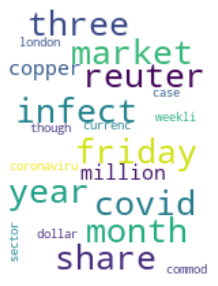

In [39]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph9.png')

In [40]:
# LSA Model
number_of_topics = 2 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_covid_non_science =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_covid_non_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled10.png')

cosine-similarity
          market     covid    friday    infect    copper
market         1  0.741138  0.986861  0.813347  0.741138
covid   0.741138         1  0.839872  0.212223         1
friday  0.986861  0.839872         1  0.708661  0.839872
infect  0.813347  0.212223  0.708661         1  0.212223
copper  0.741138         1  0.839872  0.212223         1


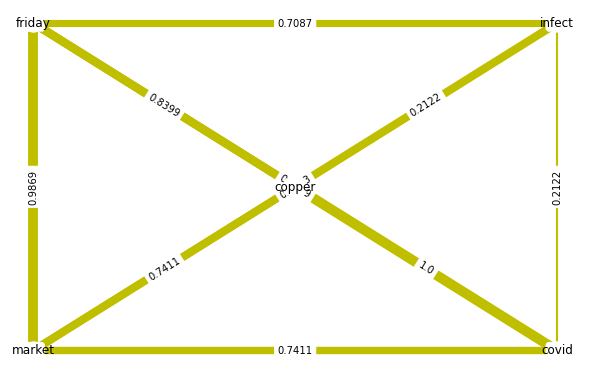

In [41]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig10.png')

### covid-psychology-small.txt

In [42]:
document_list,titles,word_count=load_data("","covid-psychology-small.txt")

Number of words in text file : 39735
Total Number of Documents: 2


In [43]:
clean_text=preprocess_data(document_list)

['international', 'sociology', 'author', 'article', 'reuse', 'guidelines', 'sagepub', 'journals', 'permissions', '0268580920948807', 'journals', 'sagepub', 'psychology', 'politics', 'covid', 'misinfodemics', 'people', 'believe', 'misinfodemics', 'sonia', 'mukhtar', 'university', 'management', 'technology', 'lahore', 'pakistan', 'abstract', 'misinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adverse', 'health', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicate', 'evidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects', 'misinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevier', 'about', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article', 'review', 'examines', 'mechanisms', 'operational', 'structure', 'preval

In [44]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_psychology =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [45]:
dict(model.show_topic(0, topn=5))

{'misinfodem': 0.5033743541941375,
 'covid': 0.3629711503323512,
 'articl': 0.2145925193519743,
 'commun': 0.14837863098037743,
 'mechan': 0.1483786309803771}

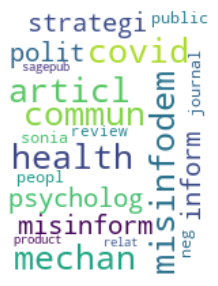

In [46]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph28.png')

In [47]:
# LSA Model
number_of_topics = 2 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_psychology =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_psychology,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled11.png')

cosine-similarity
           misinfodem     covid    articl    commun    health
misinfodem          1  0.976353  0.993795  0.755596  0.755596
covid        0.976353         1  0.946251  0.879335  0.879335
articl       0.993795  0.946251         1  0.678051  0.678051
commun       0.755596  0.879335  0.678051         1         1
health       0.755596  0.879335  0.678051         1         1


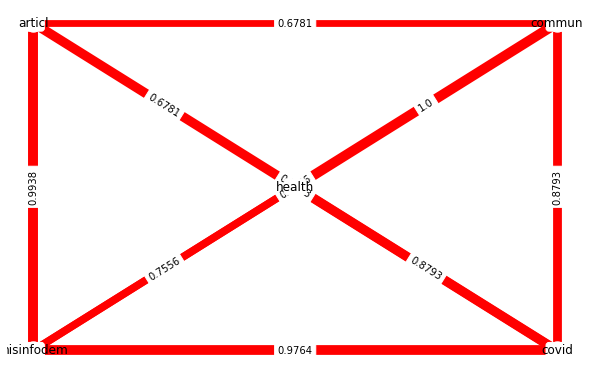

In [48]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='r',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig11.png')

## Paragraph level

### covid-science-small.txt

In [49]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r",encoding='UTF8') as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            if text !='':
                documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [50]:
document_list,titles,word_count=load_data("","covid-science-small.txt")

Number of words in text file : 59691
Total Number of Documents: 7401


In [51]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnet']
['methodology', 'predicting', 'covid']
['based', 'chest', 'images']
['tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte']
['guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova']
['olmedo', 'sánchez', 'herrera']
['abstract', 'currently', 'coronavirus', 'disease', 'covid']
['infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans']
['chest', 'images', 'computed', 'tomography']
['scanners', 'testing', 'available']
['medical', 'centers', 'hence', 'cases', 'images']
['become', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networks']
['great', 'potential', 'building', 'covid', 'triage', 'systems']
['detecting', 'covid', 'patients', 'especially', 'patients']
['severity', 'unfortunately', 'current', 'databases', 'allow']
['building', 'systems', 'highly', 'heterogeneous']
['biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sens

In [52]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_law =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [53]:
dict(model.show_topic(0, topn=5))

{'covid': 0.7920345837585167,
 'model': 0.29537097587592503,
 'imag': 0.27445108684703423,
 'detect': 0.16373379601210153,
 'class': 0.1295548151782157}

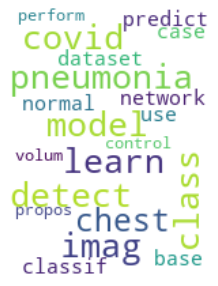

In [54]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph10.png')

In [55]:
# LSA Model
number_of_topics = 10 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_science =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled12.png')

cosine-similarity
             covid        model        imag      detect        class
covid            1  -0.00020715  -0.0465957    0.535195   0.00829016
model  -0.00020715            1 -0.00593493 -0.00404861 -0.000956952
imag    -0.0465957  -0.00593493           1     0.16776  -0.00180678
detect    0.535195  -0.00404861     0.16776           1    -0.365369
class   0.00829016 -0.000956952 -0.00180678   -0.365369            1


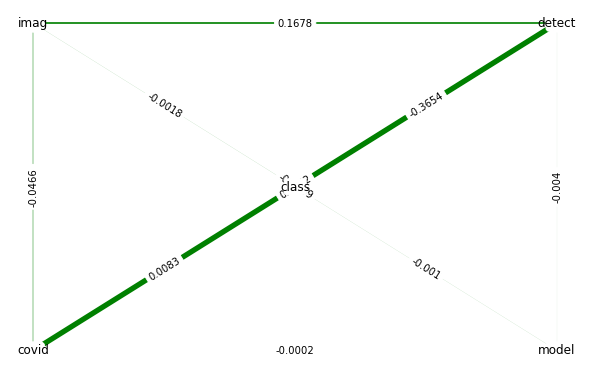

In [56]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='g',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig12.png')

### covid-non-science-small.txt

In [57]:
document_list,titles,word_count=load_data("","covid-non-science-small.txt")

Number of words in text file : 5231
Total Number of Documents: 229


In [58]:
clean_text=preprocess_data(document_list)

['covid', 'recovery', 'covid', 'reality']
['reuters']
['published', 'updated']
['jones']
['london', 'reuters', 'world', 'shares', 'inched', 'towards', 'month', 'friday', 'industrial', 'bellwether', 'metal', 'copper', 'longest', 'weekly', 'winning', 'streak', 'nearly', 'three', 'years', 'recovering', 'global', 'nagging', 'coronavirus', 'nerves']
['market', 'rally', 'fuelled', 'record', 'numbers', 'largely', 'blown', 'itself', 'spike', 'covid', 'cases', 'though', 'fastest', 'expansion', 'china', 'services', 'sector', 'decade', 'stimulus', 'ensured', 'optimism', 'remained']
['chinese', 'shares', 'charged', 'their', 'highest', 'level', 'years', 'helping', 'asian', 'indexes', 'month', 'peaks', 'sight', 'european', 'markets', 'stalling', 'early', 'traders', 'surprise']
['currency', 'commodity', 'markets', 'subdued', 'after', 'otherwise', 'strong', 'confidence', 'sensitive', 'stalwarts', 'copper', 'sterling', 'australian', 'dollar', 'which', 'struggled', 'friday']
['think', 'infection', 'rate

In [59]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_non_science =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [60]:
dict(model.show_topic(0, topn=5))

{'trial': -0.4673332754960526,
 'vaccin': -0.3789498958150885,
 'stage': -0.33285479367892024,
 'expect': -0.2332695898438176,
 'underway': -0.20015581651589393}

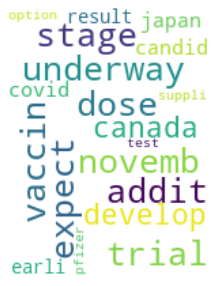

In [61]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph11.png')

In [62]:
# LSA Model
number_of_topics = 10 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_non_science =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_non_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled13.png')

cosine-similarity
             trial    vaccin     stage    expect  underway
trial            1  0.641322  0.999806   0.99831  0.988009
vaccin    0.641322         1  0.634023  0.633824  0.681318
stage     0.999806  0.634023         1  0.998265  0.988646
expect     0.99831  0.633824  0.998265         1  0.987807
underway  0.988009  0.681318  0.988646  0.987807         1


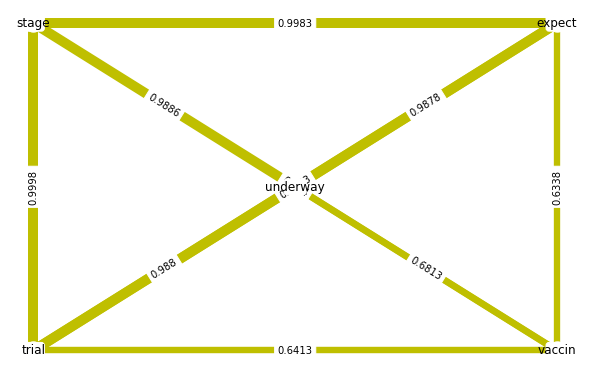

In [63]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig13.png')

### covid-psychology-small.txt

In [64]:
document_list,titles,word_count=load_data("","covid-psychology-small.txt")

Number of words in text file : 39735
Total Number of Documents: 4481


In [65]:
clean_text=preprocess_data(document_list)

['international', 'sociology']
[]
['author']
['article', 'reuse', 'guidelines']
['sagepub', 'journals', 'permissions']
['0268580920948807']
['journals', 'sagepub']
['psychology', 'politics']
['covid', 'misinfodemics']
['people']
['believe', 'misinfodemics']
['sonia', 'mukhtar']
['university', 'management', 'technology', 'lahore', 'pakistan']
['abstract']
['misinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adverse']
['health', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicate']
['evidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects']
['misinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevier']
['about', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article']
['review', 'examines', 'mechanisms', 'operational',

In [66]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_psychology =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [67]:
dict(model.show_topic(0, topn=5))

{'pandem': -0.34921779073667886,
 'polici': -0.33206442307021816,
 'health': -0.2928818651882941,
 'covid': -0.26562110600672595,
 'impact': -0.2463136783074177}

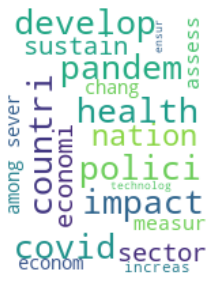

In [68]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph29.png')

In [69]:
# LSA Model
number_of_topics = 10 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_psychology =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_psychology,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled14.png')

cosine-similarity
           pandem     polici     health      covid     impact
pandem          1  0.0960013 -0.0423893  0.0261301   0.174636
polici  0.0960013          1   0.119006 -0.0321258  0.0884183
health -0.0423893   0.119006          1 -0.0192053  -0.160628
covid   0.0261301 -0.0321258 -0.0192053          1  0.0829283
impact   0.174636  0.0884183  -0.160628  0.0829283          1


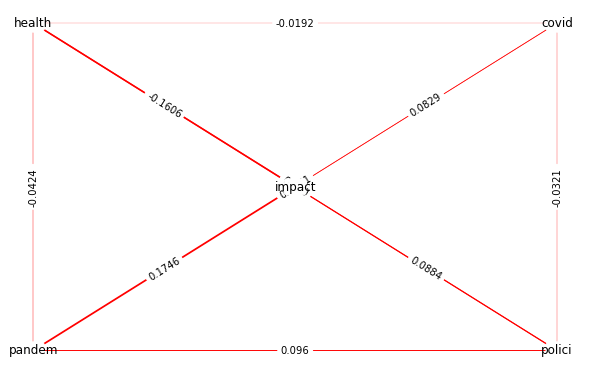

In [70]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='r',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig14.png')